## Credit Card Behaviour Score

Athour

MD Abu Bokkor Siddique

Warren , MI | 313-564-9863 | siddique5002@gmail.com | linkedin.com/in/mdsiddque

Data: Jan 25 2025

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler, LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import cross_val_score

from sklearn.metrics import roc_curve

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler  # Add this import

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score , classification_report

import warnings
warnings.filterwarnings('ignore')

In [8]:
data = pd.read_csv("C:/Users/abu_s/Desktop/Data/Json/Credit Card Behaviour Score/Dev_data_to_be_shared.csv")
data2 = pd.read_csv("C:/Users/abu_s/Desktop/Data/Json/Credit Card Behaviour Score/validation_data_to_be_shared.csv")

In [10]:
data.head(3)

,account_number,bad_flag,onus_attribute_1,transaction_attribute_1,transaction_attribute_2,transaction_attribute_3,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_7,...,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50,onus_attribute_43,onus_attribute_44,onus_attribute_45,onus_attribute_46,onus_attribute_47,onus_attribute_48
0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0,221000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0,25000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data2.head(3)

,account_number,onus_attribute_1,transaction_attribute_1,transaction_attribute_2,transaction_attribute_3,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_7,transaction_attribute_8,...,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50,onus_attribute_43,onus_attribute_44,onus_attribute_45,onus_attribute_46,onus_attribute_47,onus_attribute_48
0,100001,34000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN
1,100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,100003,130000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
account_number,96806.0,48403.500000,27945.629417,1.0,24202.25,48403.5,72604.75,96806.000
bad_flag,96806.0,0.014173,0.118203,0.0,0.00,0.0,0.00,1.000
onus_attribute_1,71575.0,154239.119804,172992.463938,25000.0,59000.00,100000.0,181000.00,2800000.000
transaction_attribute_1,71575.0,9.570769,1513.967595,0.0,0.00,0.0,0.00,398936.791
transaction_attribute_2,71575.0,0.002207,0.119240,0.0,0.00,0.0,0.00,25.000
...,...,...,...,...,...,...,...,...
onus_attribute_44,11610.0,1.497158,1.702795,0.0,1.00,1.0,2.00,38.000
onus_attribute_45,11610.0,0.545650,1.055865,0.0,0.00,0.0,1.00,19.000
onus_attribute_46,11610.0,1.430491,1.728950,0.0,1.00,1.0,2.00,38.000
onus_attribute_47,11610.0,0.121447,0.601256,0.0,0.00,0.0,0.00,15.000


In [16]:
data.isnull().sum()

account_number                 0
bad_flag                       0
onus_attribute_1           25231
transaction_attribute_1    25231
transaction_attribute_2    25231
                           ...  
onus_attribute_44          85196
onus_attribute_45          85196
onus_attribute_46          85196
onus_attribute_47          85196
onus_attribute_48          85196
Length: 1216, dtype: int64

## Data Preprocessing

In [27]:
# Function to handle missing values
def handle_missing_values(df):
    # Calculate missing percentages
    missing_pct = (df.isnull().sum() / len(df)) * 100
    
    # Drop columns with > 70% missing values
    cols_to_drop = missing_pct[missing_pct > 70].index
    df_cleaned = df.drop(columns=cols_to_drop)
    
    # Fill remaining missing values with median (more robust than mean)
    numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
    df_cleaned[numeric_cols] = df_cleaned[numeric_cols].fillna(df_cleaned[numeric_cols].median())
    
    return df_cleaned

# Clean both datasets
df_data = handle_missing_values(data)
df_data2= handle_missing_values(data2)

## Data Visualization

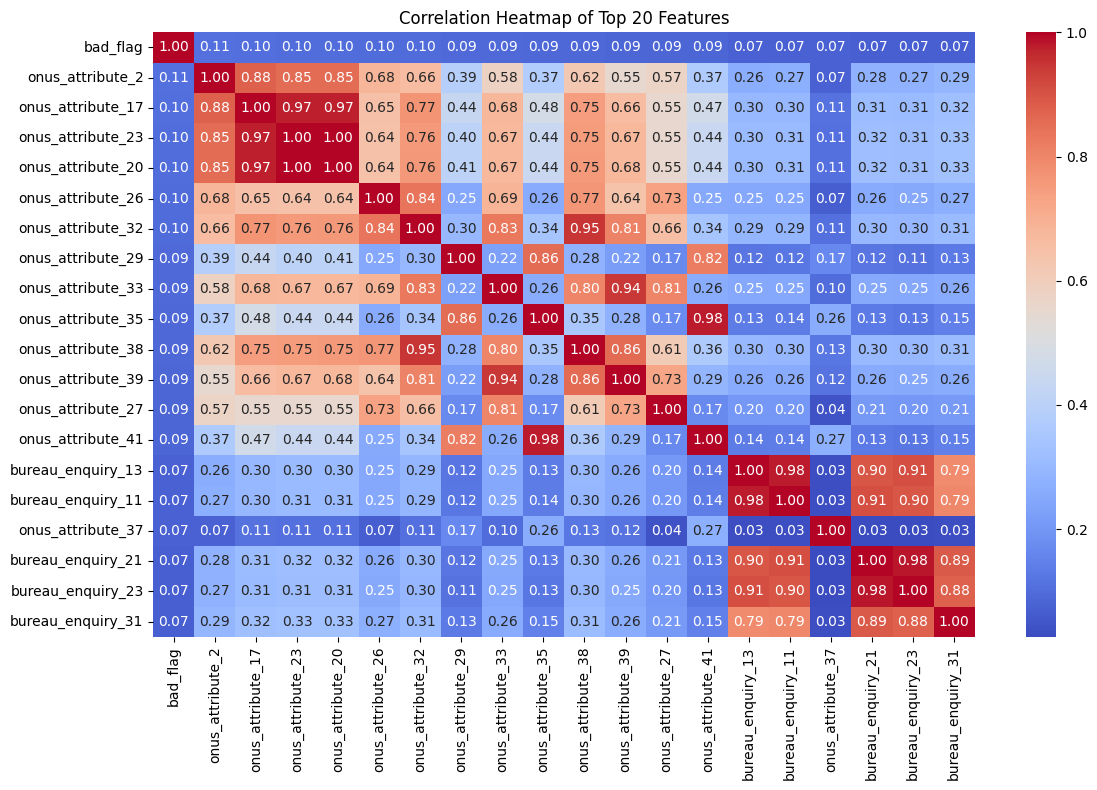

In [60]:
# Calculate correlation with target variable only
target_corr = df_data.corr()['bad_flag']
top_features = target_corr.abs().sort_values(ascending=False)[:20].index

# Calculate correlations only for important features
important_corr = df_data[top_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(important_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Top 20 Features')
plt.tight_layout()
plt.show()

In [46]:
target_corr1 = df_data['bad_flag'].sort_values(ascending=False)
print(target_corr1[:10])

12364    1
81822    1
10097    1
10094    1
81838    1
75199    1
69755    1
2978     1
33976    1
93822    1
Name: bad_flag, dtype: int64


## Train And Test Modele

In [37]:
# Prepare features and target
X = df_data.drop(['bad_flag', 'account_number'], axis=1)
y = df_data['bad_flag']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y )


# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## SMOTE for handling imbalance 

In [44]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Initialize models with balanced class weights
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(
        scale_pos_weight=96.6/3.4,  # Class weight based on distribution
        max_depth=6,
        learning_rate=0.1,
        random_state=42
    )
}

# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_balanced, y_train_balanced)
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    results[name] = {
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }


Training Logistic Regression...

Training Random Forest...

Training XGBoost...


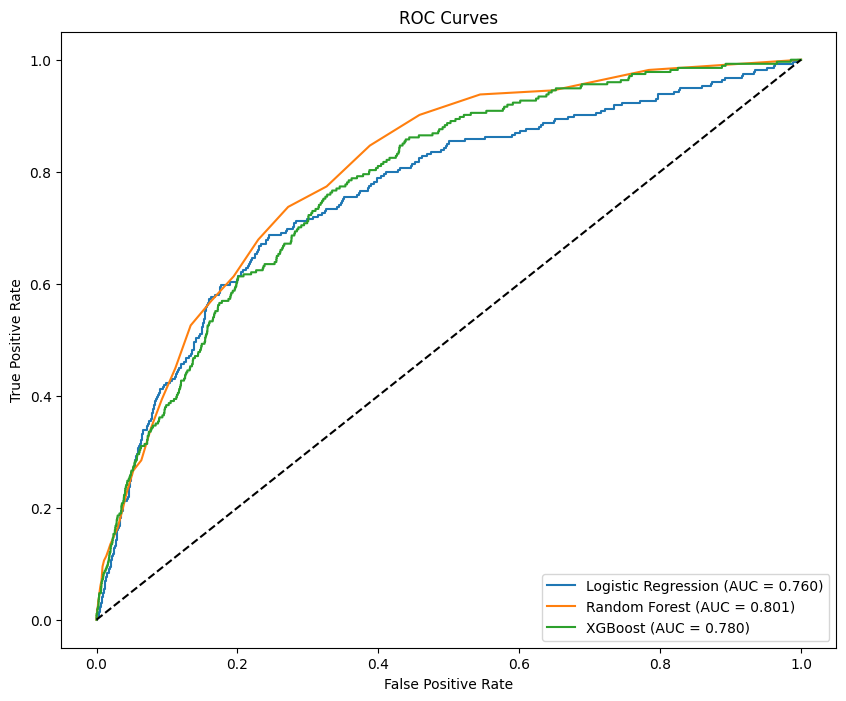

In [58]:
from sklearn.metrics import roc_curve, auc


# Adjust the figure size
plt.figure(figsize=(10, 8))  # Width x Height in inches

# Assuming `results` is a dictionary containing model results
# and `y_test` is the ground truth for the test set
for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['probabilities'])  # Calculate FPR and TPR
    roc_auc = auc(fpr, tpr)  # Calculate AUC
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

# Plot the baseline for random guessing
plt.plot([0, 1], [0, 1], 'k--')

# Add labels, title, and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')

# Show the plot
plt.show()

